# Repeat observation frequency (clonotypes)

The frequency of repeat observations, or the number of sequences that were observed in more than one biological replicate of a single subject, is quantified by analysing increasingly large downsamples of each subject's sequence dataset to compute the frequency of identical clonotypes. In this notebook, we're going to make the following figure:

  * Lineplot of clonotype repeat observation (**Extended Data Figure 5a**)
  
The following Python packages are required to run this notebook:

  * matplotlib
  * seaborn
  * [abutils](https://github.com/briney/abutils)
  
They can be install by running `pip install matplotlib seaborn abutils`

In [12]:
from __future__ import print_function, division

import os
import sys

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from abutils.utils.pipeline import list_files, make_dir

%matplotlib inline

## Input data

The repeat observation subsampling data in our manuscript is included in this Github repository. However, if you've generated your own input data (either independently or using the code provided [**here**](LINK) using something other than the default output location) and you've saved that data to a different location, please modify the path/filename below.

In [ ]:
input_dir = './data/equal_fraction_downsampling/'
input_filename = 'clonotype-downsampling_duplicate-counts_vj-aa.txt'
infile = os.path.join(input_dir, input_filename)

## Load data

In [3]:
def resample_fraction(samples):
    sample = 0
    resample = 0
    for s in samples.keys():
        if s > 1:
            resample += samples[s]
        else:
            sample += samples[s]
    return float(resample) / (sample + resample)

In [4]:
data = {}
with open(infile) as f:
    subject_samples = f.read().split('#')[1:]
    for ss in subject_samples:
        subject = ss.split('\n')[0]
        data[subject] = {}
        subsamples = '\n'.join(ss.split('\n'))[1:].split('>')
        for subsample in subsamples[1:]:
            subsample_size = float(subsample.split('\n')[0])
            data[subject][subsample_size] = []
            vals = subsample.split('\n')[1:]
            for val in vals:
                if not val.split():
                    continue
                d = [v.split(':') for v in val.split()]
                data[subject][subsample_size].append({int(k): int(v) for k, v in d})

sample_resample = {}
for subject in data:
    sample_resample[subject] = {}
    for subsample in data[subject]:
        sample_resample[subject][subsample] = []
        for iteration in data[subject][subsample]:
            sample_resample[subject][subsample].append(resample_fraction(iteration))

## Plot capture-recapture curves

If you'd like to save the figure file (rather than just showing inline without saving), comment out the `plt.show()` line and uncomment the final two lines of the below code block.

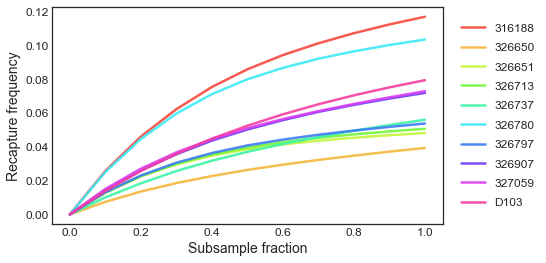

In [11]:
# initialize plot
sns.set_style('white')
plt.figure(figsize=(7, 4))

# set colors
colors = sns.hls_palette(10, s=0.9)
colors[3] = sns.hls_palette(11, s=0.9)[3]
colors[4] = sns.hls_palette(12, s=0.9)[5]

# make plot
for color, subject in zip(colors, sorted(sample_resample.keys())):
    x = sorted(sample_resample[subject].keys())
    ys = [np.mean(sample_resample[subject][k]) for k in x]
    plt.plot([0] + x, [0] + ys, c=color, linewidth=2.5, alpha=0.9, label=subject)

# style the plot
ax = plt.gca()
# set axis labels
ax.set_xlabel('Subsample fraction', fontsize=14)
ax.set_ylabel('Recapture frequency', fontsize=14)
# style ticks
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
# plot legend
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, loc='upper left', fontsize=11.5)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1, handletextpad=.75, labelspacing=0.75, fontsize=12)

# save or show
plt.show()
# plt.tight_layout(rect=[0,0,0.8,1])
# plt.savefig('./figures/capture-recapture-frequency_by-clonotype-fraction.pdf')